In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
from google.colab import files
upload=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
df=pd.read_csv('Company_Data.csv')

In [4]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
df=df.drop(['Education','Urban','US'],axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder


In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [8]:
df["ShelveLoc"]=label_encoder.fit_transform(df["ShelveLoc"])


In [9]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age
0,9.50,138,73,11,276,120,0,42
1,11.22,111,48,16,260,83,1,65
2,10.06,113,35,10,269,80,2,59
3,7.40,117,100,4,466,97,2,55
4,4.15,141,64,3,340,128,0,38
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33
396,6.14,139,23,3,37,120,2,55
397,7.41,162,26,12,368,159,2,40
398,5.94,100,79,7,284,95,0,50


In [10]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
dtype: int64

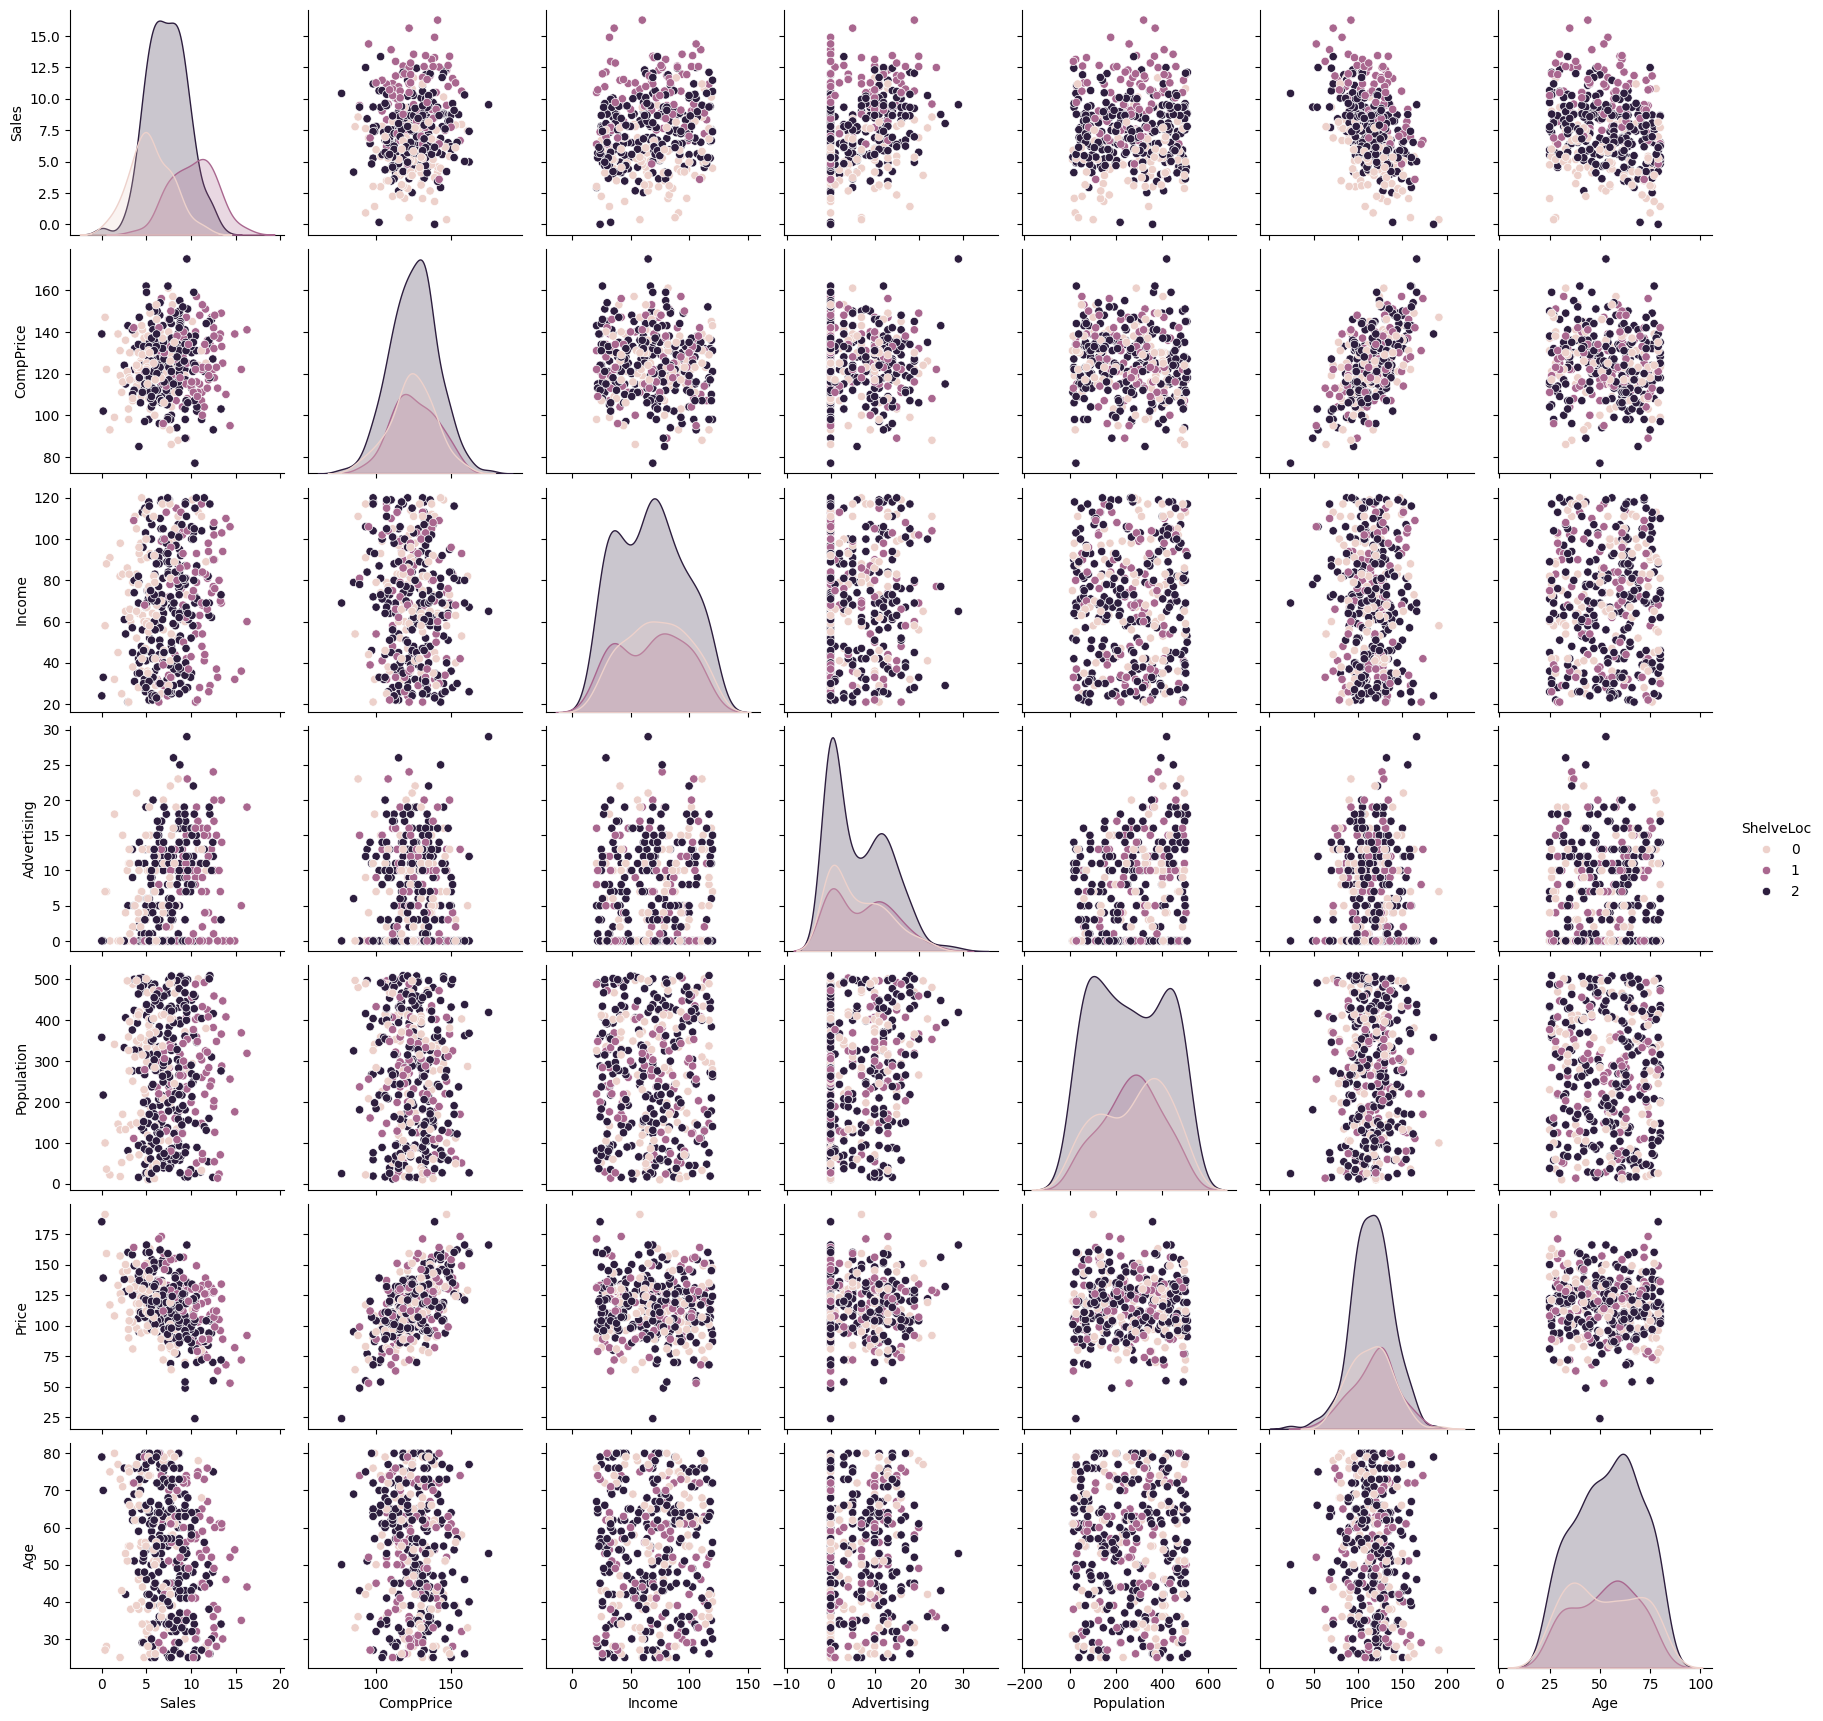

In [11]:
sns.pairplot(data=df, hue = 'ShelveLoc')

In [12]:
import warnings
warnings.filterwarnings("ignore")

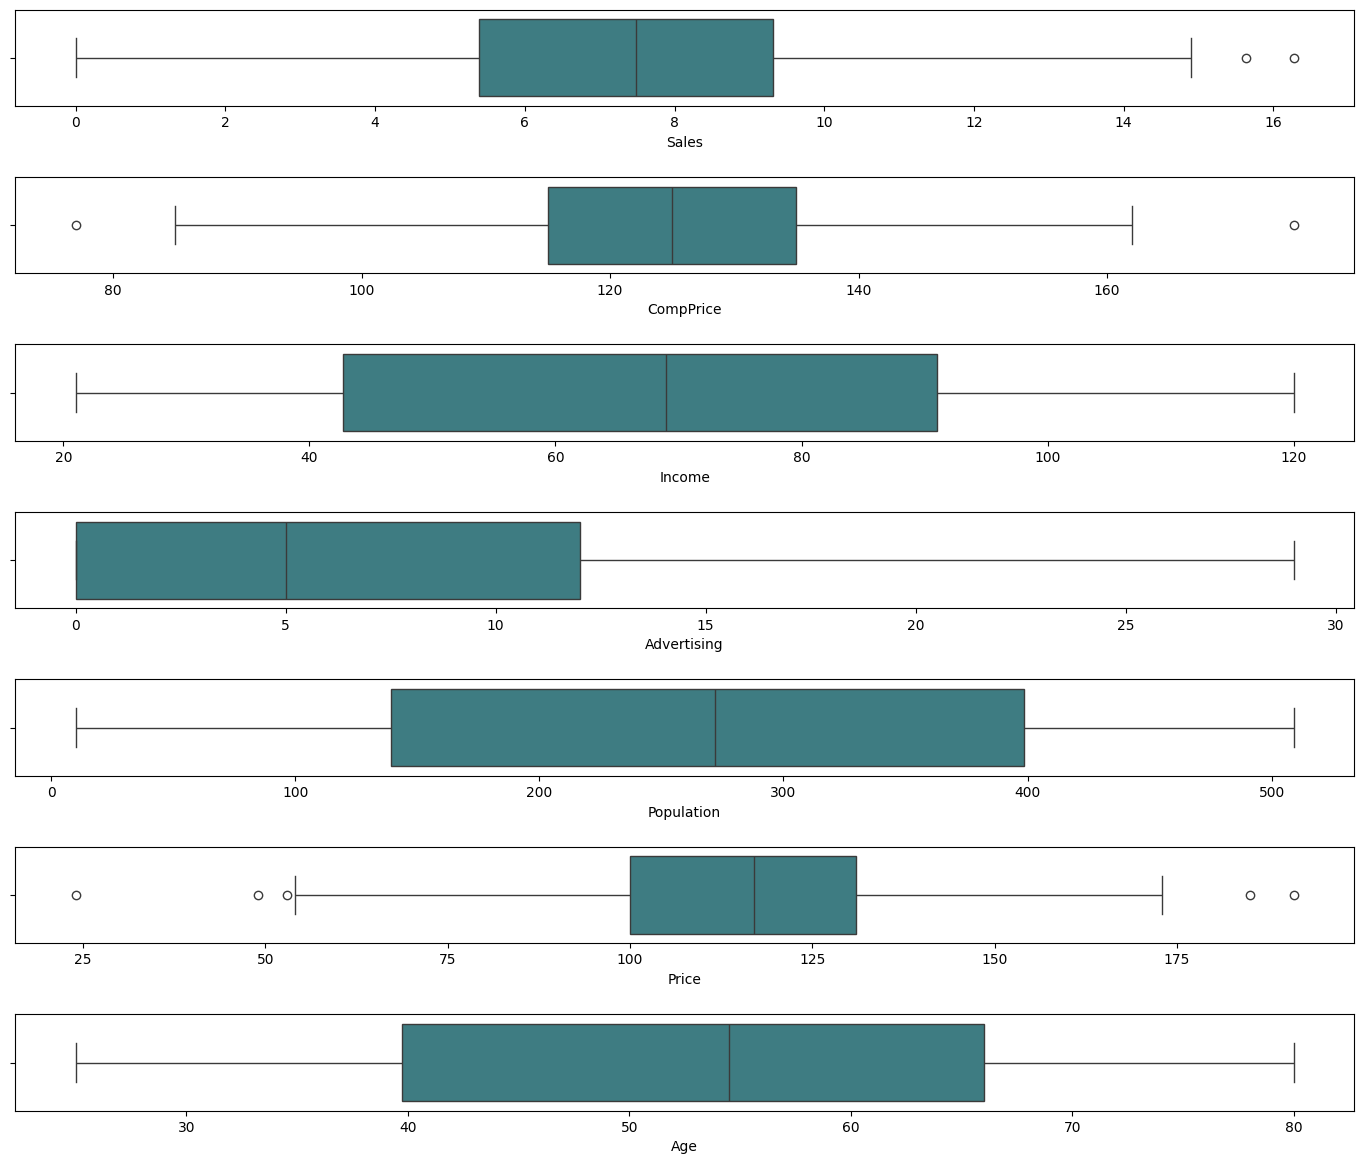

In [13]:
ot=df.copy()
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

<Axes: >

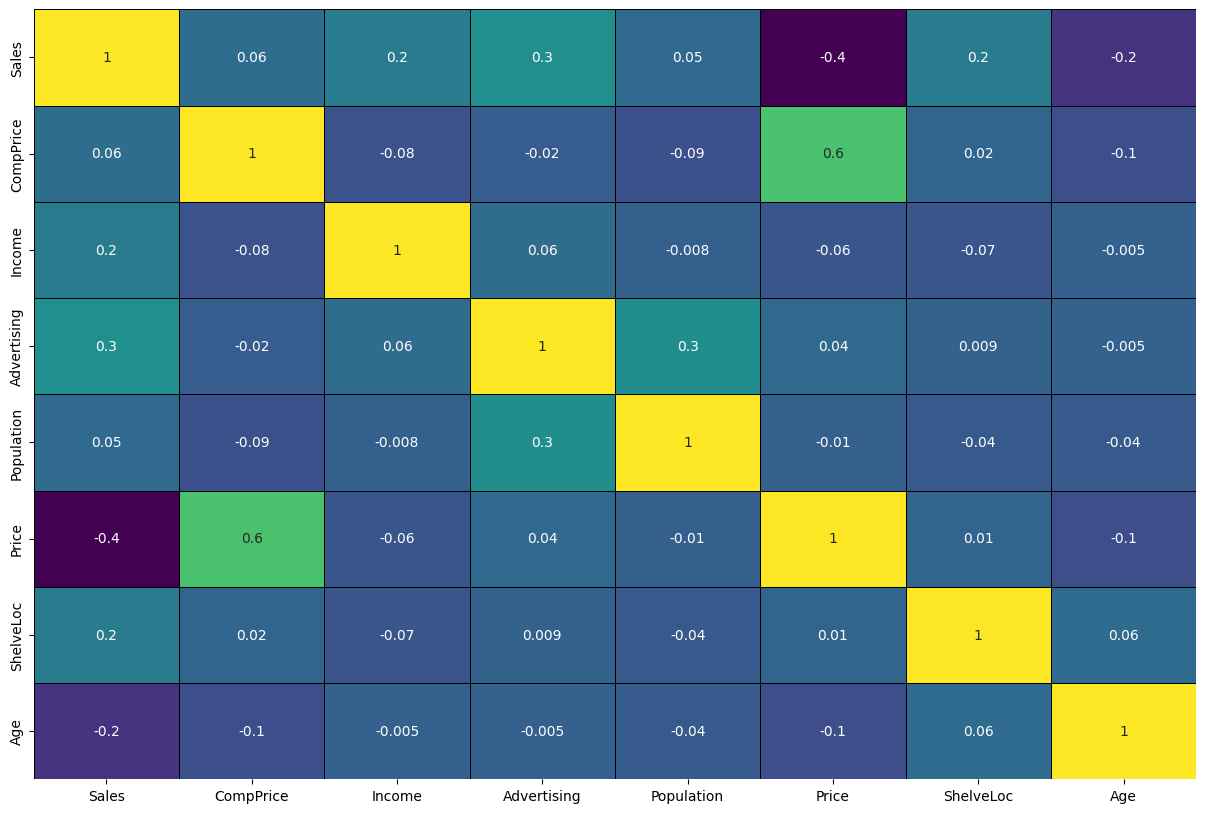

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

In [15]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [16]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age'],
      dtype='object')

In [17]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age
0,9.50,138,73,11,276,120,0,42
1,11.22,111,48,16,260,83,1,65
2,10.06,113,35,10,269,80,2,59
3,7.40,117,100,4,466,97,2,55
4,4.15,141,64,3,340,128,0,38
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33
396,6.14,139,23,3,37,120,2,55
397,7.41,162,26,12,368,159,2,40
398,5.94,100,79,7,284,95,0,50


In [18]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [19]:
X=df.iloc[:,0:6]
Y=df.iloc[:,6]
seed=7

In [20]:
X

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [21]:
Y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [22]:
num_trees = 100
max_features = 5
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)

[0.625 0.675 0.725 0.55  0.675 0.675 0.5   0.6   0.7   0.6  ]


In [23]:
results.mean()

0.6325000000000001

In [24]:
clf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
clf.fit(X, Y)
print('checking score',clf.oob_score_)

checking score 0.6325


In [25]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X, Y)

print('Best Score',grid_search.best_score_)
rf_best = grid_search.best_estimator_
print(rf_best)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Best Score 0.635
RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)
